# **Fourier transforms for Image Processing using python**

Introduction

    In our world today image processing has been a field of so much interest in research and development with evolving technologies around computer vision applications, imaging analysis. Every application based on vision boils down to the use of imagery. Withdrawing useful insights from images therefore brings up the concept of image processing or analysis. 
    
    An image can basically be understood as a matrix array of arrays containing numbers.

*Defination*

    Fourier transforms can simply be termed as a frequncy domain transform of time domain based signal processing. Fourier transform is a digtal signal processing technique utilized in solving problems in areas like image processing, video processing etc.

*Defination of signal processing*

    Signal processing can be termed as an act of modifying, synthesizing signals into desired results/outputs this includes sounds, images, medical/biological measurements etc. 
    
    Signals can be defined as anything that represents an information.
    *Analog signals- This are continuous time signals. Individual un-interruped points.
    *Digital signals - This are discrete time signals (1s and 0s). This are sampled points, points that are only defined.

Defination of image processing

    image processing is a digital signal processing technique utlized for image transformation, manipulations, enhancement and information generation from images. Techniques used for this concept includes, 

2. *Types of Fourier transforms includes:*


1. Discrete time signal.
    * Aperiodic Discrete time signal.
    * Periodic Discrete time signals.
2. continuous time signal.
    * Aperiodic continuous time signal.
    * Periodic continuous time signal.


images can be represented as a discrete time signals (they are not continuous), therefore the signal 
processing techniques used here is the Discrete Fourier Transforms (DFT). Videos are termed to be 
continuous frames of images, transforms applicable in this case is the continuous fourier transform.

Images are represented as a 3 channel(R, G and B) 2-dimensional array.

Discrete Fourier transforms for an M by N 2 dimensional channel array can be transformed mathematically as:

$$F(k,l) = \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} f(i,j) e^{-2i\pi(\frac{ki}{N}+ \frac{kj}{N})}$$

The inverse Discrete Fourier transform (inverse DFT) can be represented as:

$$F(i,j) = \frac{1}{N^2} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} f(k,l) e^{2i\pi(\frac{ki}{N}+ \frac{kj}{N})}$$

This equation can also be represented as:

$$F(k,l) = \sum_{i=0}^{m-1} f(a,b) e^{-2i\pi(\frac{ki}{N})}$$

Where,

$$F(a,b)= \sum_{j=0}^{n-1} f(i,j)e^{-2i\pi(\frac{kj}{N})}$$

   ![jupyter logo](transforms.png)

![jupyter logo](transforms2.png)

In [1]:
import sympy

Fourier Transform is used to analyze the frequency characteristics of various filters. For images, 2D Discrete Fourier Transform (DFT) is used to find the frequency domain. A fast algorithm called Fast Fourier Transform (FFT) is used for calculation of DFT. 

### FFT in Numpy

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('python.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 10*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<Figure size 640x480 with 2 Axes>

the above magnitude spectrum simply describes the frequncy content of the image to be low (more whiter region at the center).
Knowing the frequency transform of the image we can do some operations in the frequency domain, like high pass filtering, image reconstruction (finding inverse DFT).
To find inverse DFT we have to remove the low frequencies by masking with a rectangular window of size 60 by 60 then aply the inverse shift using np.fft.ifftshift() so that DC component again come at the top-left corner. Then find inverse FFT using np.ifft2() function. The result, again will be a complex number. you can take its absolute value.

1024 1024 512.0 512.0


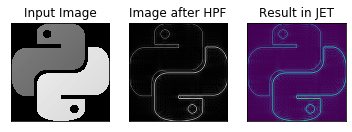

In [3]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
print(rows, cols, crow, ccol)
fshift[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()


### FFT in opencv

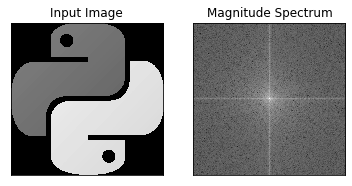

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('python.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

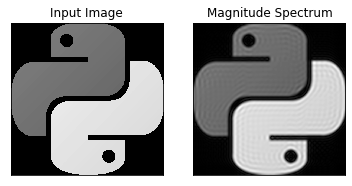

In [21]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
crow , ccol = int(crow), int(ccol)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### laplacian as High pass Filter

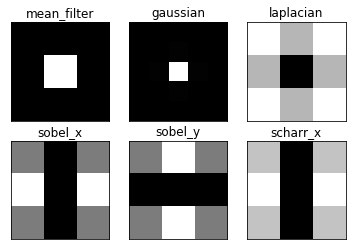

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

# low pass filters

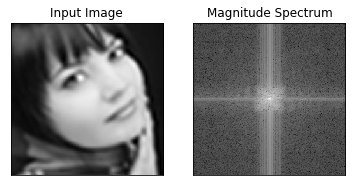

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('low_res_image.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 10*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
#convert to numpy array
img_array = np.asarray(img)
img_array.shape

(240, 240)

In [14]:
from scipy.signal import lfilter

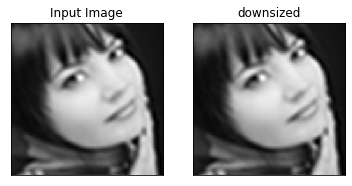

In [22]:
def factor(img_one, factor):
    minimize = (factor)*img_one
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(minimize, cmap = 'gray')
    plt.title('downsized'), plt.xticks([]), plt.yticks([])
    plt.show()
    return

factor(img_array, 1)

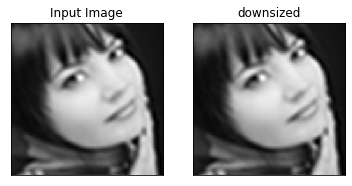

In [38]:
factor(img_array, 1)

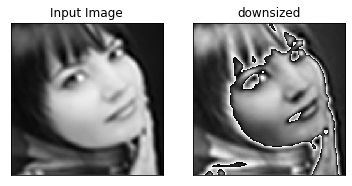

In [39]:
factor(img_array, 2)

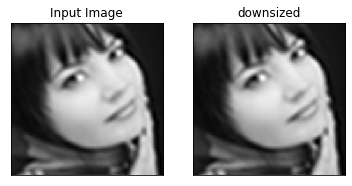

In [45]:
factor(img_array, 1)

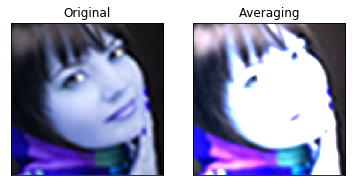

In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('low_res_image.jpg')


def intensity(img, scale):
    #scale is 10, 
    #kernel size is 5 by 5
    # This is dependent on the type of filter used. 
    #changing the filter changes the image intensity and also
    # changing the scaling factor also alters the image intensity.
    kernel = np.ones((5,5),np.float32)/10
    dst = cv2.filter2D(img,-1,kernel)

    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return

intensity(img, 100)

# Gaussian filtering

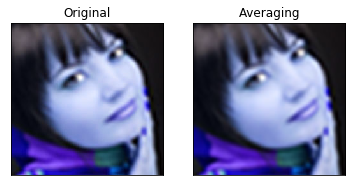

In [72]:
def Gaussian(img, filter_dimension):
    k = (filter_dimension, filter_dimension)
    blur = cv2.GaussianBlur(img,(k),0)

    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return
Gaussian(img, 3)

# median filtering

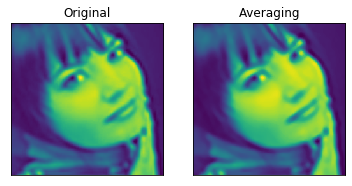

In [83]:
img = cv2.imread('low_res_image.jpg',0)
def median_filter(img, key):
    median = cv2.medianBlur(img,key)

    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(median),plt.title('Averaging')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return
median_filter(img, 5)

## Fast fourier transforms for image processing

FFT is an algorithm that plays an important role in the computation of Discrete fourier transform of a sequence. Its converts a space or time domain signal into its frequency domain conterpart.

The DFT signal is generated by the distribution of values represented as sequences which is then converted to its frequency component.

Working directly to convert on fourier transform is computationally too expensive. So, FFT is used as it rapidly computes by factorizing the DFT matrix as the product of sparse factors. In essence, it reduces the computational complexity from O(n squared) to O(N log N). This is a huge difference when working on a large dataset.

Also, FFT algorithms are very accurate as compared to the DFT defination directly, in the presence of round-off error.



FFT can perform DFT in the complex domain. Automatically,
the sequence is padded with zero to the right because the radix-2
FFT requires the sample point number as a power of 2.

In [1]:
import sympy
sympy.discrete.transforms.fft([1,2,34])


[37, -33 + 2*I, 33, -33 - 2*I]

In [2]:
from sympy import fft
seq = [1,2,34]
transform = fft(seq)
print(transform)

[37, -33 + 2*I, 33, -33 - 2*I]


In [3]:
decimal_point = 4
transform = fft(seq, decimal_point)
print("FFT: ", transform)

FFT:  [37, -33.0 + 2.0*I, 33, -33.0 - 2.0*I]


In [5]:
import numpy as np
arr = np.array([[1,2,3],[4,5,6],[6,7,8]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [6, 7, 8]])

Fourier transform is used to analyze the frequency characteristics of various filters.
for images, 2D discrete fourier transform (DFT) is used to find the frequency domain. FFT is used for calculation of DFT.

An image is a signal sampled in 2 directions. So taking fourier transform in both X and Y direction gives the frequency representation of the image.

for a sinusoidal signal, x(t)= Asin(2pift), we can say f is the frequency of the signal, and if its frequncy domain is taken, we can see a spike at f.

More intuitively, for the sinusoidal signal, if the amplitude varies so fast in short time, we can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. We can extend the same idea to images, the amplitude varies drastically in images at the edge points or noises. So we cans say, edges and noises are high frequency contents in an image. if there is no much change in amplitude, it is a low frequency component.